In [30]:
import pandas as pd
import streamlit as st
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [31]:
loan_df = pd.read_csv("Data/insurance_dataset.csv")

In [32]:
loan_df.head(), loan_df.info(), loan_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  Outcome         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


(   age           job  marital education_qual call_type  day  mon  dur  \
 0   58    management  married       tertiary   unknown    5  may  261   
 1   44    technician   single      secondary   unknown    5  may  151   
 2   33  entrepreneur  married      secondary   unknown    5  may   76   
 3   47   blue-collar  married        unknown   unknown    5  may   92   
 4   33       unknown   single        unknown   unknown    5  may  198   
 
    num_calls prev_outcome Outcome  
 0          1      unknown      no  
 1          1      unknown      no  
 2          1      unknown      no  
 3          1      unknown      no  
 4          1      unknown      no  ,
 None,
                  age          job  marital education_qual call_type  \
 count   45211.000000        45211    45211          45211     45211   
 unique           NaN           12        3              4         3   
 top              NaN  blue-collar  married      secondary  cellular   
 freq             NaN         9732  

In [33]:
"""age (int64):
The age of the client.

job (object):
The type of job the client has (e.g., "admin", "technician", "entrepreneur").

marital (object):
The marital status of the client (e.g., "married", "single", "divorced").

education_qual (object):
The education level of the client (e.g., "secondary", "tertiary", "primary").

call_type (object):
The type of communication used for contacting the client (e.g., "cellular", "telephone").

day (int64):
The day of the month when the client was last contacted.

mon (object):
The month during which the client was last contacted (e.g., "jan", "feb").

dur (int64):
The duration of the last call (in seconds).

num_calls (int64):
The number of contacts made to the client during the campaign.

prev_outcome (object).
The outcome of the previous marketing campaign (e.g., "success", "failure").

Outcome (object):
The result of the current marketing campaign for the client (e.g., "yes", "no")."""

'age (int64):\nThe age of the client.\n\njob (object):\nThe type of job the client has (e.g., "admin", "technician", "entrepreneur").\n\nmarital (object):\nThe marital status of the client (e.g., "married", "single", "divorced").\n\neducation_qual (object):\nThe education level of the client (e.g., "secondary", "tertiary", "primary").\n\ncall_type (object):\nThe type of communication used for contacting the client (e.g., "cellular", "telephone").\n\nday (int64):\nThe day of the month when the client was last contacted.\n\nmon (object):\nThe month during which the client was last contacted (e.g., "jan", "feb").\n\ndur (int64):\nThe duration of the last call (in seconds).\n\nnum_calls (int64):\nThe number of contacts made to the client during the campaign.\n\nprev_outcome (object).\nThe outcome of the previous marketing campaign (e.g., "success", "failure").\n\nOutcome (object):\nThe result of the current marketing campaign for the client (e.g., "yes", "no").'

In [34]:
loan_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [35]:
loan_df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [36]:
loan_df.shape

(45211, 11)

In [37]:
for i in list(loan_df.columns):
    print(f"{i}:{loan_df[i].nunique()}")

age:77
job:12
marital:3
education_qual:4
call_type:3
day:31
mon:12
dur:1573
num_calls:48
prev_outcome:4
Outcome:2


In [38]:
loan_df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
Outcome           object
dtype: object

In [39]:
loan_df.describe(include="all")

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,3,NaN,12,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,cellular,NaN,may,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,29285,NaN,13766,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,NaN,NaN


In [40]:
loan_df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
Outcome           0
dtype: int64

In [41]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  Outcome         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [42]:
loan_df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [43]:
import re
# Function to clean and convert job categories to uppercase
def clean_and_uppercase(job):
    # Remove periods and hyphens
    job = re.sub(r'[.-]', '', job)
    # Convert to uppercase
    return job.upper()

In [44]:
loan_df['job'] = loan_df['job'].apply(lambda x: clean_and_uppercase(x))

In [45]:
loan_df.job.unique()

array(['MANAGEMENT', 'TECHNICIAN', 'ENTREPRENEUR', 'BLUECOLLAR',
       'UNKNOWN', 'RETIRED', 'ADMIN', 'SERVICES', 'SELFEMPLOYED',
       'UNEMPLOYED', 'HOUSEMAID', 'STUDENT'], dtype=object)

In [46]:
loan_df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [47]:
loan_df['marital'] = loan_df['marital'].apply(lambda x : clean_and_uppercase(x))

In [48]:
loan_df.marital.unique()

array(['MARRIED', 'SINGLE', 'DIVORCED'], dtype=object)

In [49]:
loan_df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [50]:
loan_df['education_qual'] = loan_df['education_qual'].apply(lambda x : clean_and_uppercase(x))

In [51]:
loan_df.education_qual.unique()

array(['TERTIARY', 'SECONDARY', 'UNKNOWN', 'PRIMARY'], dtype=object)

In [52]:
loan_df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [53]:
loan_df['call_type'] = loan_df['call_type'].apply(lambda x : clean_and_uppercase(x))

In [54]:
loan_df.call_type.unique()

array(['UNKNOWN', 'CELLULAR', 'TELEPHONE'], dtype=object)

In [55]:
loan_df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [56]:
loan_df['mon'] = loan_df['mon'].apply(lambda x: clean_and_uppercase(x))

In [57]:
loan_df.mon.unique()

array(['MAY', 'JUN', 'JUL', 'AUG', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB',
       'MAR', 'APR', 'SEP'], dtype=object)

In [58]:
month_dict = {
    'JAN': 1,
    'FEB': 2,
    'MAR': 3,
    'APR': 4,
    'MAY': 5,
    'JUN': 6,
    'JUL': 7,
    'AUG': 8,
    'SEP': 9,
    'OCT': 10,
    'NOV': 11,
    'DEC': 12
}

In [59]:
loan_df['mon'] = loan_df['mon'].map(month_dict)

In [60]:
loan_df.mon.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [61]:
loan_df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [62]:
loan_df['prev_outcome'] = loan_df['prev_outcome'].apply(lambda x : clean_and_uppercase(x))

In [63]:
loan_df.prev_outcome.unique()

array(['UNKNOWN', 'FAILURE', 'OTHER', 'SUCCESS'], dtype=object)

In [64]:
loan_df.Outcome.unique()

array(['no', 'yes'], dtype=object)

In [65]:
loan_df['Outcome'] = loan_df['Outcome'].apply(lambda x:clean_and_uppercase(x))

In [66]:
loan_df.Outcome.unique()

array(['NO', 'YES'], dtype=object)

In [67]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# loan_df['scaled_dur'] = scaler.fit_transform(loan_df[['dur']])

In [68]:
category_distributions = {}
for column in loan_df.select_dtypes(include=['object']):
    category_distributions[column] = loan_df[column].value_counts()

# Display distributions
for column, distribution in category_distributions.items():
    print(f"Distribution of '{column}':")
    print(distribution)
    print()

Distribution of 'job':
job
BLUECOLLAR      9732
MANAGEMENT      9458
TECHNICIAN      7597
ADMIN           5171
SERVICES        4154
RETIRED         2264
SELFEMPLOYED    1579
ENTREPRENEUR    1487
UNEMPLOYED      1303
HOUSEMAID       1240
STUDENT          938
UNKNOWN          288
Name: count, dtype: int64

Distribution of 'marital':
marital
MARRIED     27214
SINGLE      12790
DIVORCED     5207
Name: count, dtype: int64

Distribution of 'education_qual':
education_qual
SECONDARY    23202
TERTIARY     13301
PRIMARY       6851
UNKNOWN       1857
Name: count, dtype: int64

Distribution of 'call_type':
call_type
CELLULAR     29285
UNKNOWN      13020
TELEPHONE     2906
Name: count, dtype: int64

Distribution of 'prev_outcome':
prev_outcome
UNKNOWN    36959
FAILURE     4901
OTHER       1840
SUCCESS     1511
Name: count, dtype: int64

Distribution of 'Outcome':
Outcome
NO     39922
YES     5289
Name: count, dtype: int64



In [69]:
loan_df['job'].replace('UNKNOWN', 'OTHER', inplace=True)
loan_df['call_type'].replace('UNKNOWN', 'OTHER', inplace=True)
loan_df['prev_outcome'].replace('UNKNOWN', 'OTHER', inplace=True)


C:\Users\venka\AppData\Local\Temp\ipykernel_6240\822009561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['job'].replace('UNKNOWN', 'OTHER', inplace=True)
C:\Users\venka\AppData\Local\Temp\ipykernel_6240\822009561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [70]:
loan_df['education_qual'].replace('UNKNOWN', 'OTHER', inplace=True)

C:\Users\venka\AppData\Local\Temp\ipykernel_6240\249440248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['education_qual'].replace('UNKNOWN', 'OTHER', inplace=True)


In [71]:
job_dict = {
    'MANAGEMENT': 0,
    'TECHNICIAN': 1,
    'ENTREPRENEUR': 2,
    'BLUECOLLAR': 3,
    'OTHER': 4,
    'RETIRED': 5,
    'ADMIN': 6,
    'SERVICES': 7,
    'SELFEMPLOYED': 8,
    'UNEMPLOYED': 9,
    'HOUSEMAID': 10,
    'STUDENT': 11
}


In [72]:
marital_dict = {
    'MARRIED': 0,
    'SINGLE': 1,
    'DIVORCED': 2
}


In [73]:
education_qual_dict = {
    'TERTIARY': 0,
    'SECONDARY': 1,
    'OTHER': 2,
    'PRIMARY': 3
}


In [74]:
call_type_dict = {
    'OTHER': 0,
    'CELLULAR': 1,
    'TELEPHONE': 2
}


In [75]:
prev_outcome_dict = {
    'OTHER': 0,
    'FAILURE': 1,
    'OTHER': 2,
    'SUCCESS': 3
}


In [76]:
outcome_dict = {
    'NO': 0,
    'YES': 1
}


In [77]:
loan_df['job'] = loan_df['job'].map(job_dict)

In [78]:
loan_df['education_qual'] = loan_df['education_qual'].map(education_qual_dict)
loan_df['call_type'] = loan_df['call_type'].map(call_type_dict)
loan_df['prev_outcome']=loan_df['prev_outcome'].map(prev_outcome_dict)
loan_df['Outcome'] = loan_df['Outcome'].map(outcome_dict)

In [79]:
loan_df['marital']= loan_df['marital'].map(marital_dict)

In [80]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.526133,3.098343,0.0,1.0,3.0,6.0,11.0
marital,45211.0,0.513238,0.692948,0.0,0.0,0.0,1.0,2.0
education_qual,45211.0,1.049944,0.968986,0.0,0.0,1.0,1.0,3.0
call_type,45211.0,0.776293,0.549747,0.0,0.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
mon,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
prev_outcome,45211.0,1.925018,0.369059,1.0,2.0,2.0,2.0,3.0


In [81]:
loan_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,0,0,0,0,5,5,261,1,2,0
1,44,1,1,1,0,5,5,151,1,2,0
2,33,2,0,1,0,5,5,76,1,2,0
3,47,3,0,2,0,5,5,92,1,2,0
4,33,4,1,2,0,5,5,198,1,2,0


In [82]:
from matplotlib import pyplot as plt
import seaborn as sns


def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [83]:
loan_df.dtypes

age               int64
job               int64
marital           int64
education_qual    int64
call_type         int64
day               int64
mon               int64
dur               int64
num_calls         int64
prev_outcome      int64
Outcome           int64
dtype: object

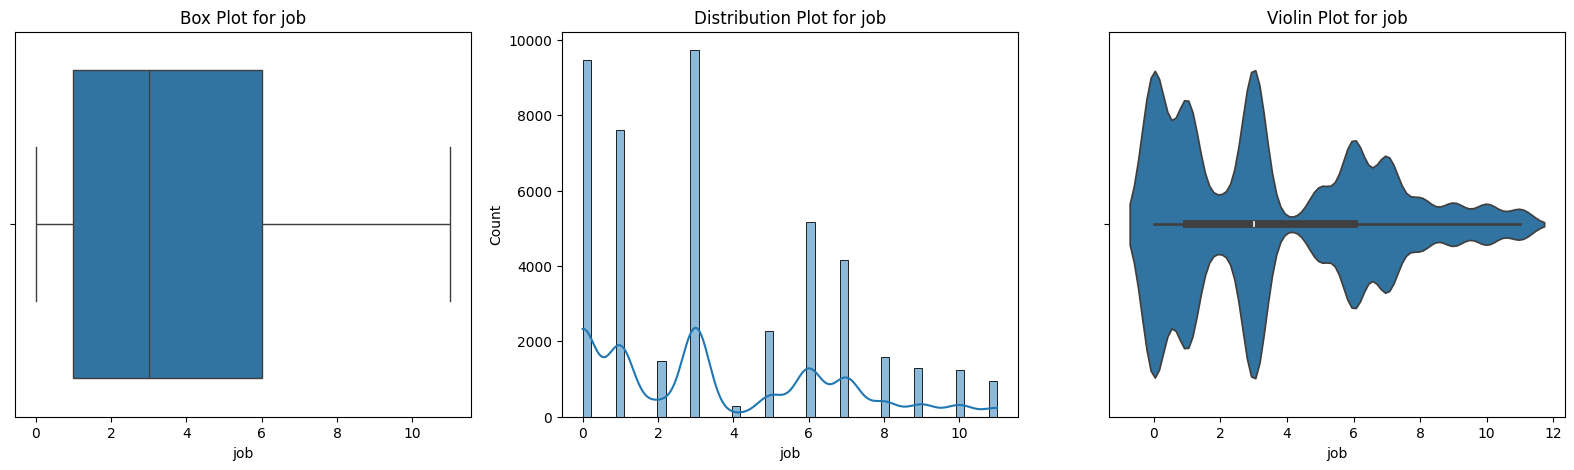

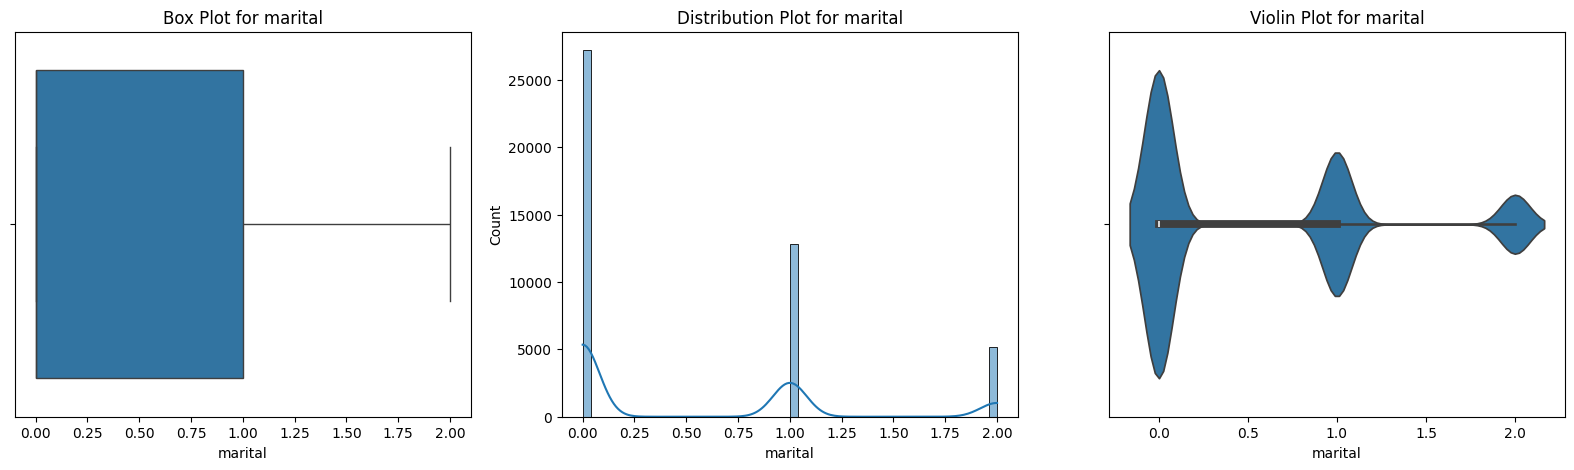

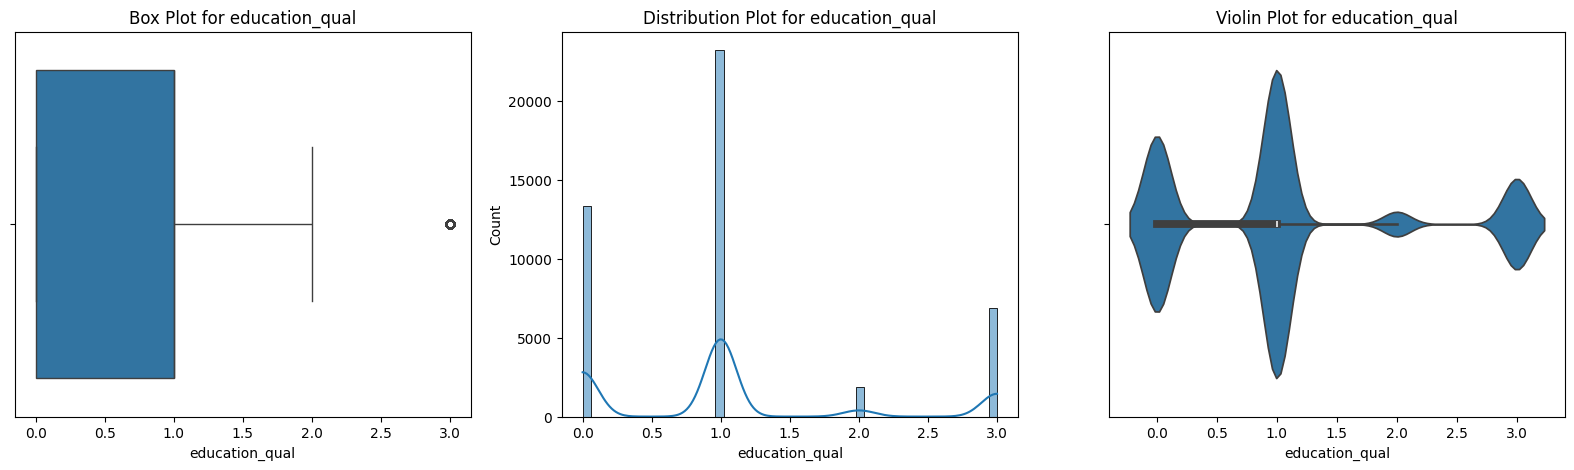

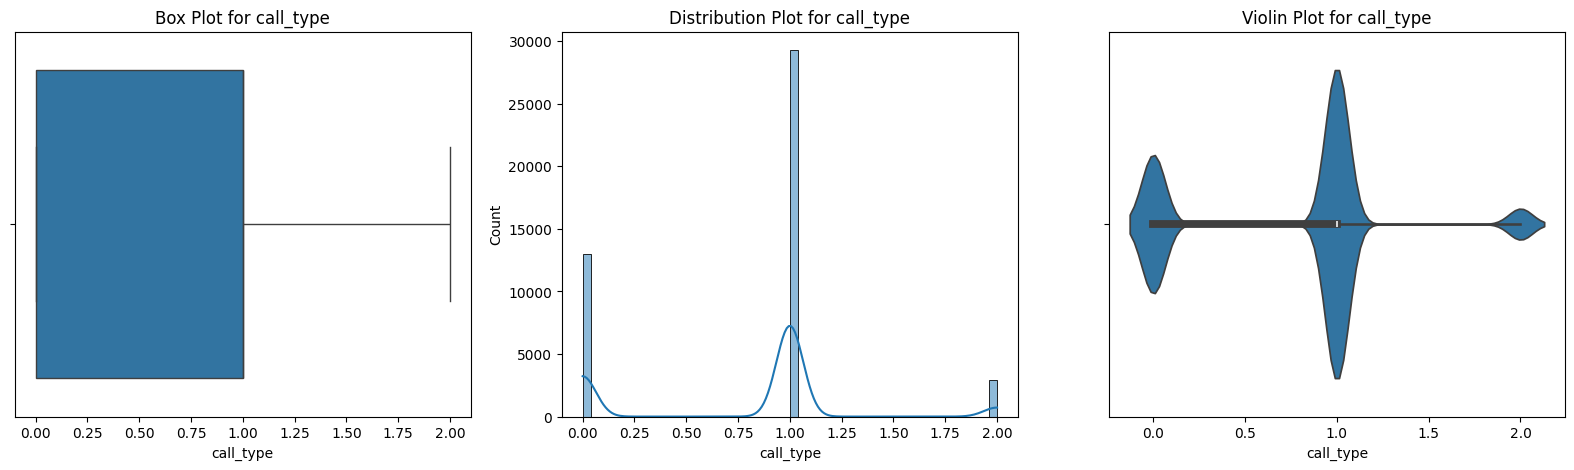

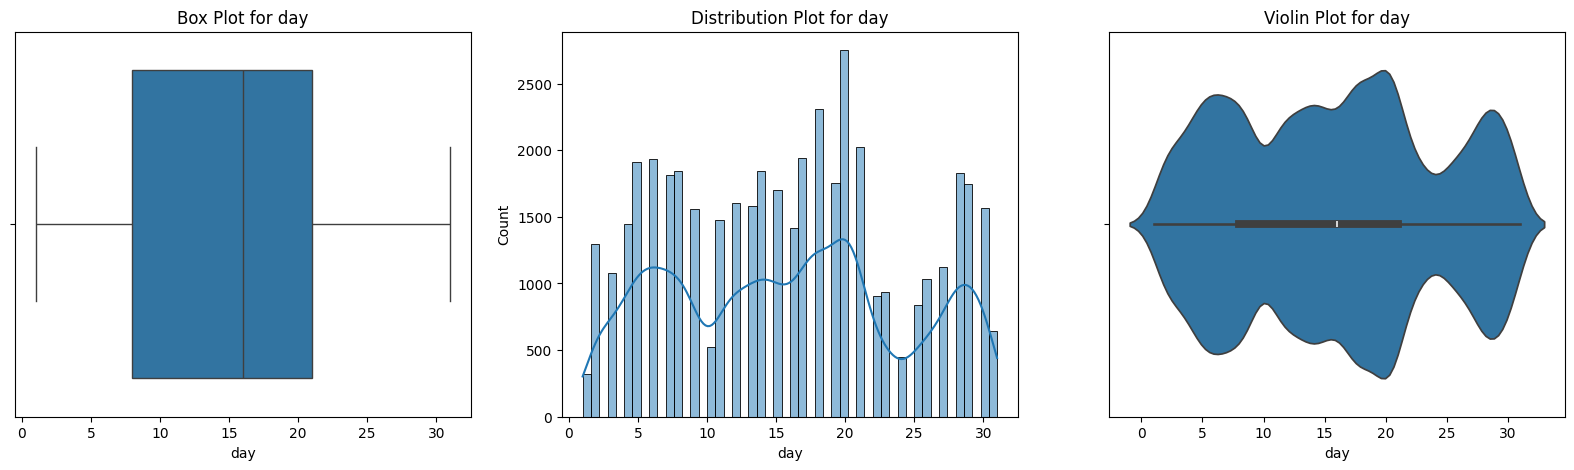

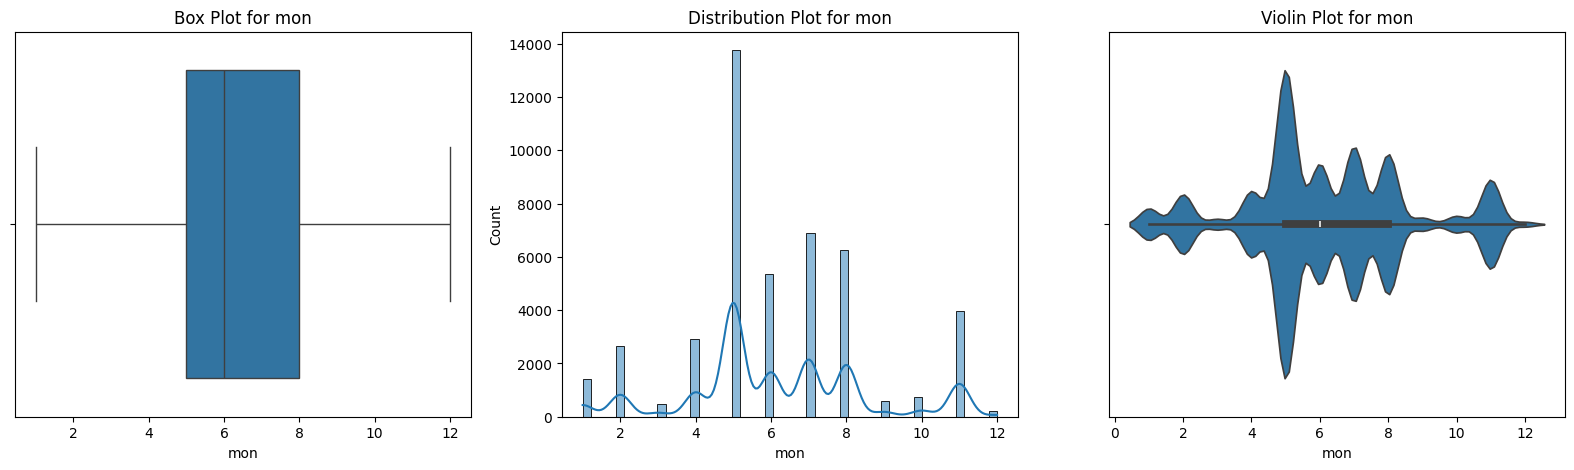

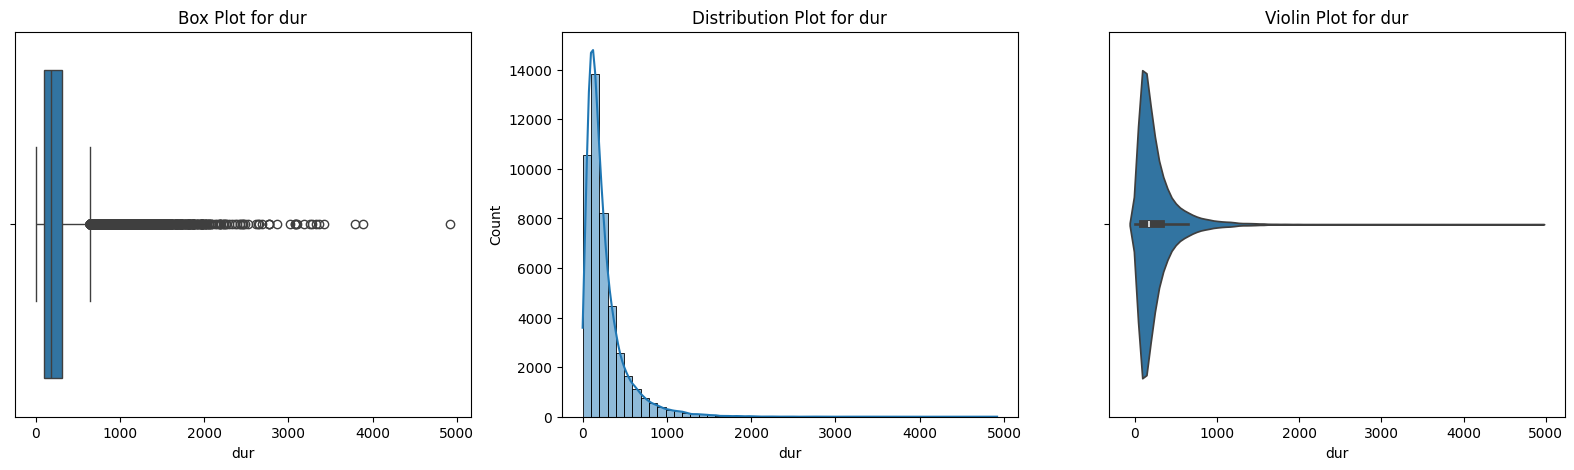

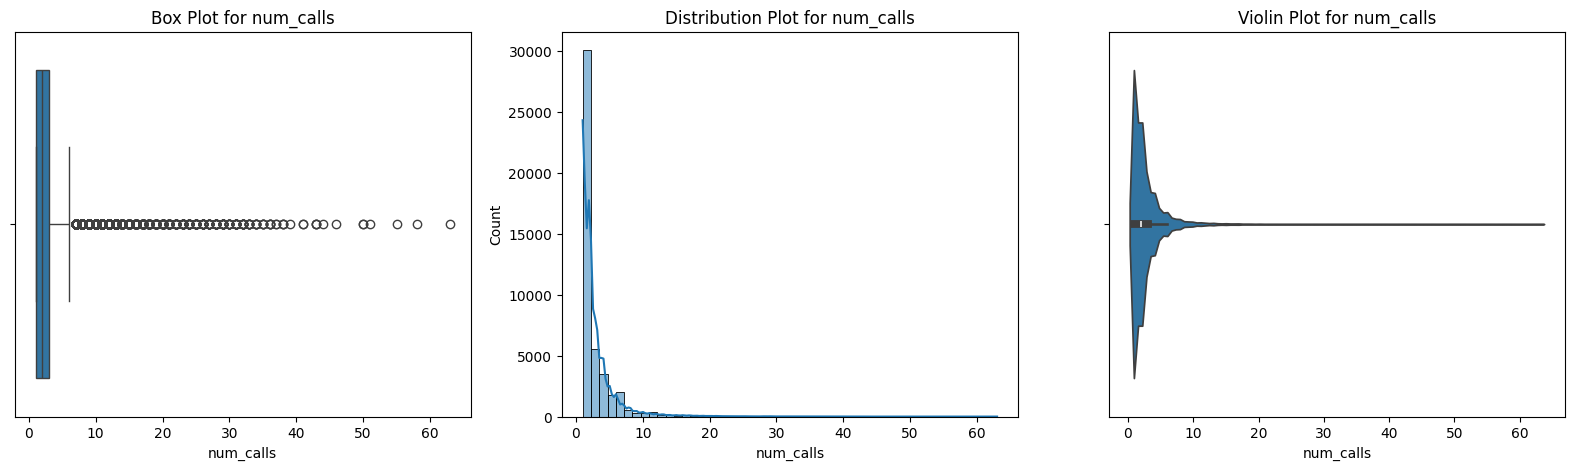

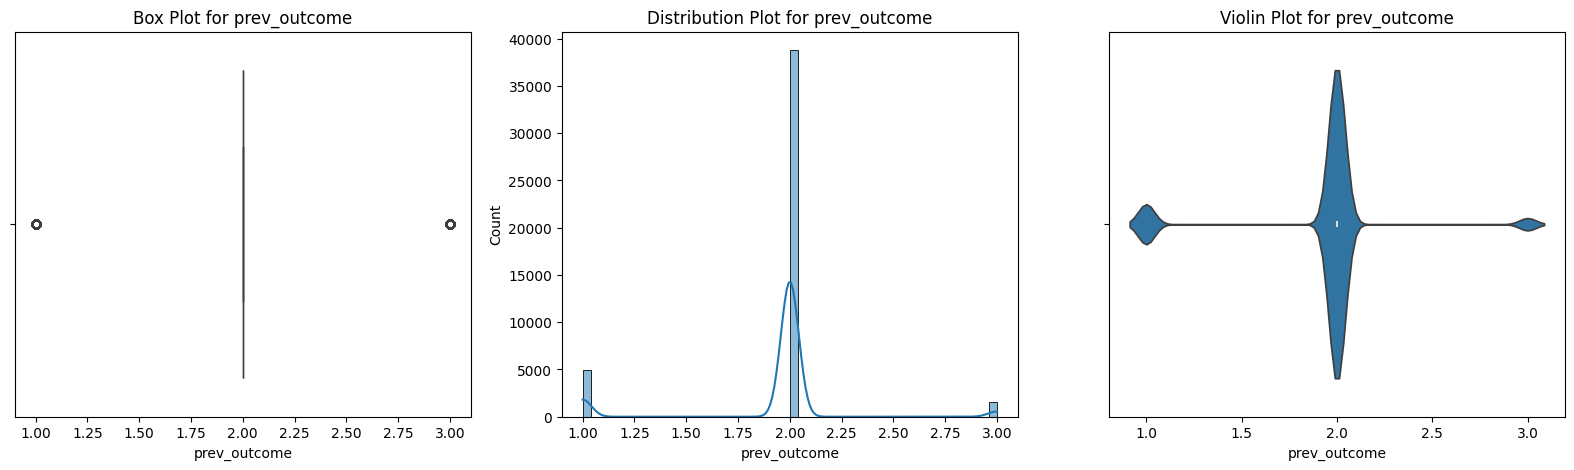

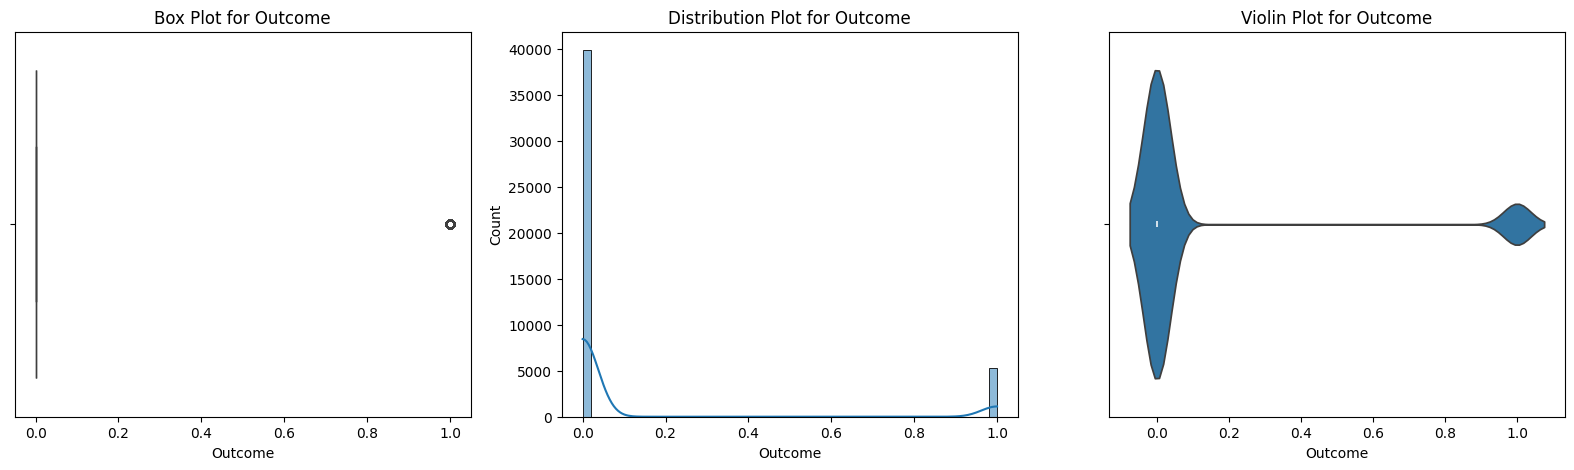

In [84]:
for i in [
    "job",
    "marital",
    "education_qual",
    "call_type",
    "day",
    "mon",
    "dur",
    "num_calls",
    "prev_outcome",
    "Outcome",
]:
    plot(loan_df, i)

In [85]:
# dur and num_calls having higher ouliers we need to sort it using IQR
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [86]:
loan_df_iqr = loan_df.copy()

In [87]:
outlier(loan_df_iqr,'dur')
outlier(loan_df_iqr,'num_calls')

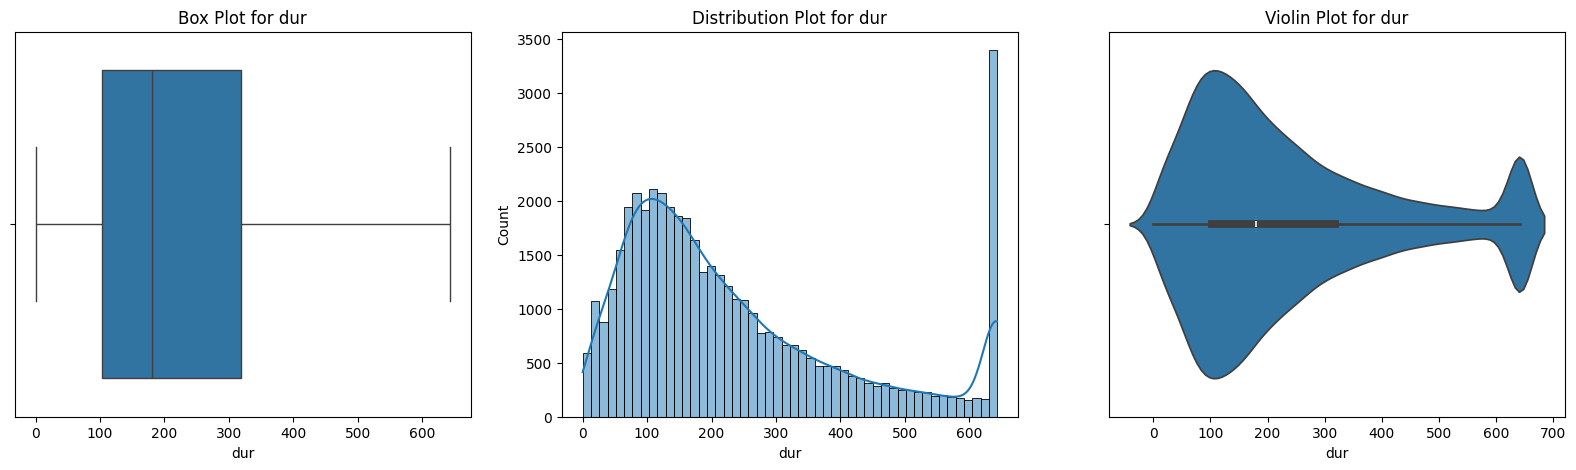

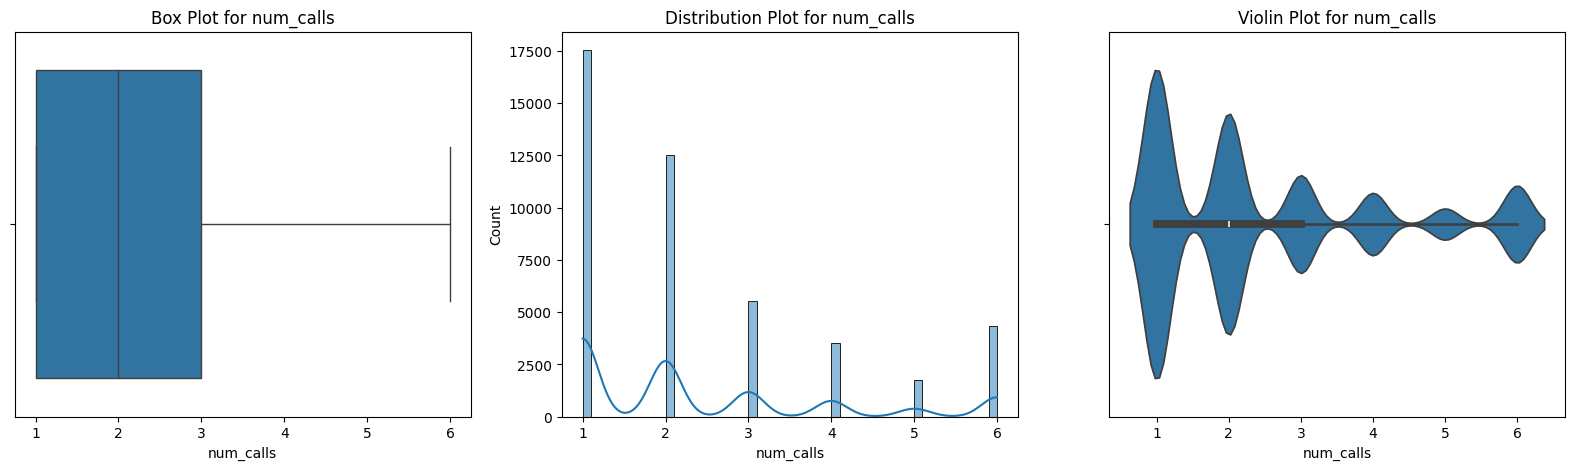

In [88]:
for i in ['dur','num_calls']:
    plot(loan_df_iqr, i)

In [89]:
coorelation_matrix = loan_df_iqr.corr()

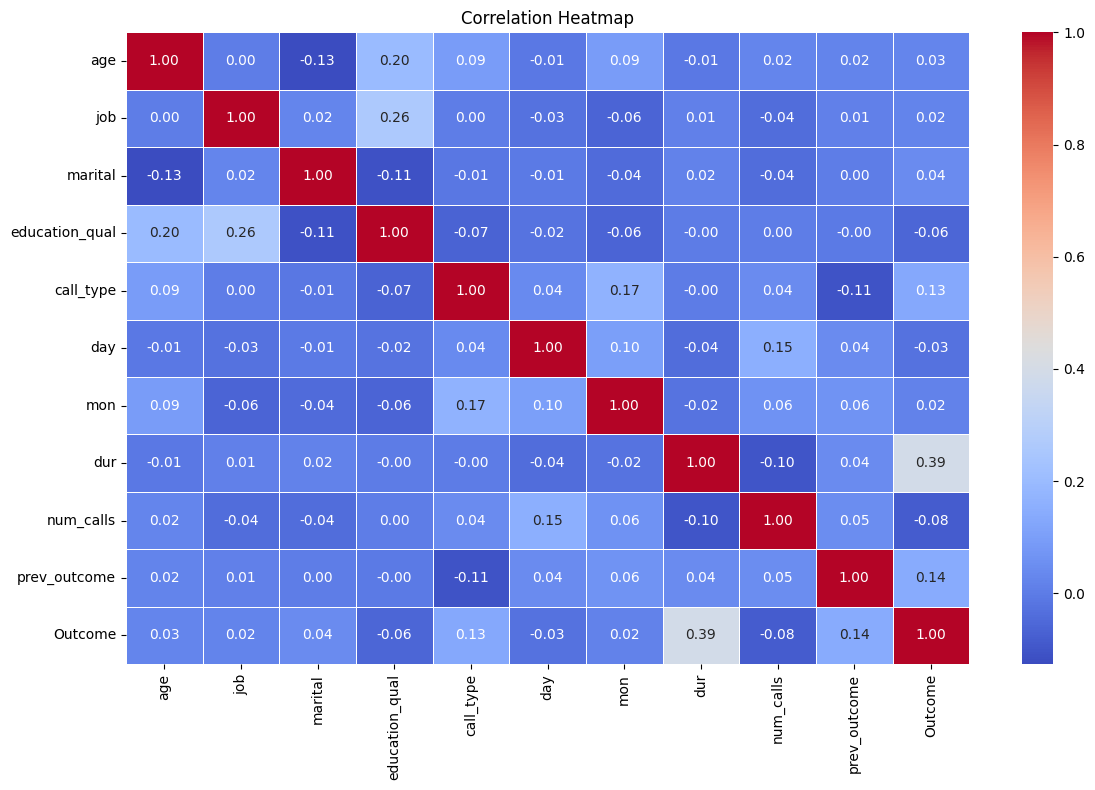

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(coorelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [91]:
loan_df_iqr.head(5)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,0,0,0,0,5,5,261,1,2,0
1,44,1,1,1,0,5,5,151,1,2,0
2,33,2,0,1,0,5,5,76,1,2,0
3,47,3,0,2,0,5,5,92,1,2,0
4,33,4,1,2,0,5,5,198,1,2,0


In [92]:
loan_df_iqr.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.526133,3.098343,0.0,1.0,3.0,6.0,11.0
marital,45211.0,0.513238,0.692948,0.0,0.0,0.0,1.0,2.0
education_qual,45211.0,1.049944,0.968986,0.0,0.0,1.0,1.0,3.0
call_type,45211.0,0.776293,0.549747,0.0,0.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
mon,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
dur,45211.0,234.939307,176.749932,0.0,103.0,180.0,319.0,643.0
num_calls,45211.0,2.392228,1.600111,1.0,1.0,2.0,3.0,6.0
prev_outcome,45211.0,1.925018,0.369059,1.0,2.0,2.0,2.0,3.0


In [93]:
loan_classifier = loan_df_iqr.copy()

In [94]:
# filter the status column values only 1 & 0 rows in a new dataframe ['YES':1 & 'NO':0]
loan_classifier = loan_classifier[(loan_classifier.Outcome == 1) | (loan_classifier.Outcome == 0)]
loan_classifier

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,0,0,0,0,5,5,261,1,2,0
1,44,1,1,1,0,5,5,151,1,2,0
2,33,2,0,1,0,5,5,76,1,2,0
3,47,3,0,2,0,5,5,92,1,2,0
4,33,4,1,2,0,5,5,198,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,1,17,11,643,3,2,1
45207,71,5,2,3,1,17,11,456,2,2,1
45208,72,5,0,1,1,17,11,643,5,3,1
45209,57,3,0,1,2,17,11,508,4,2,0


In [95]:
loan_classifier['Outcome'].value_counts()

Outcome
0    39922
1     5289
Name: count, dtype: int64

In [96]:
from imblearn.combine import SMOTETomek

In [97]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

In [98]:


def machine_learning_classification(x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Identify columns to scale
    columns_to_scale = ['age', 'day', 'mon', 'dur', 'job']
    scaler = StandardScaler()

    # Apply scaling to all columns
    x_train_scaled = x_train.copy()
    x_test_scaled = x_test.copy()
    # x_train_scaled = scaler.fit_transform(x_train)
    # x_test_scaled = scaler.transform(x_test)
    x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
    x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])
    
    

    # Apply SMOTETomek to the scaled training data
    smote_tomek = SMOTETomek()
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train_scaled, y_train)

    # Train the model
    model = algorithm().fit(x_train_resampled, y_train_resampled)

    # Make predictions
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)

    # Calculate accuracy
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # Retrieve algorithm name
    algo_name = algorithm.__name__

    accuracy_metrics = {'algorithm': algo_name,
                        'accuracy_train': accuracy_train,
                        'accuracy_test': accuracy_test}

    return accuracy_metrics


<!-- <Scaling 'age', 'day', 'mon', 'dur', 'job' columss-> -->
<!-- {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.9981198849811989, 'accuracy_test': 0.864425522503594}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.9969862862198628, 'accuracy_test': 0.8852150834899922}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9976775049767751, 'accuracy_test': 0.8885325666261197}
c:\Users\venka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8524939172749392, 'accuracy_test': 0.8461793652548932}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8641340411413404, 'accuracy_test': 0.8571270596041137}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9344448130944482, 'accuracy_test': 0.9002543403737697} -->

<!-- <Scaling all columss-> -->

<!-- {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.9978157487281575, 'accuracy_test': 0.8651996019020237}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.9974839637248396, 'accuracy_test': 0.8920712153046555}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9974563149745631, 'accuracy_test': 0.8932876257879022}
c:\Users\venka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.863885202388852, 'accuracy_test': 0.8625456153931218}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8745576199955762, 'accuracy_test': 0.8687382505805595}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9349424905994249, 'accuracy_test': 0.9024659957978547} -->


In [99]:
x = loan_classifier.drop('Outcome', axis=1)
y = loan_classifier['Outcome']



print(machine_learning_classification(x, y, DecisionTreeClassifier))
print(machine_learning_classification(x, y, ExtraTreesClassifier))
print(machine_learning_classification(x, y, RandomForestClassifier))
print(machine_learning_classification(x, y, AdaBoostClassifier))
print(machine_learning_classification(x, y, GradientBoostingClassifier))
print(machine_learning_classification(x, y, XGBClassifier))


{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.9976775049767751, 'accuracy_test': 0.8625456153931218}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.9974563149745631, 'accuracy_test': 0.8849939179475838}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.9975669099756691, 'accuracy_test': 0.8903018909653876}


c:\Users\venka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8510561822605618, 'accuracy_test': 0.846953444653323}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8652676399026764, 'accuracy_test': 0.8600022116554241}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9320393718203938, 'accuracy_test': 0.9000331748313612}


In [100]:

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify columns to scale
columns_to_scale = ['age', 'day', 'mon', 'dur', 'job']
scaler = StandardScaler()

# Apply scaling to all columns
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

# Apply SMOTETomek to the scaled training data
smote_tomek = SMOTETomek()
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train_scaled, y_train)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize and fit GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_resampled, y_train_resampled)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn import metrics

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Identify columns to scale
columns_to_scale = ["age", "day", "mon", "dur", "job"]
scaler = StandardScaler()

# Apply scaling to all columns
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

# Apply SMOTETomek to the scaled training data
smote_tomek = SMOTETomek()
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train_scaled, y_train)

# Initialize XGBClassifier with hyperparameters
model = XGBClassifier(
    colsample_bytree=0.9,
    learning_rate=0.1,
    max_depth=9,
    n_estimators=200,
    subsample=1.0,
)

# Fit the model
model.fit(x_train_resampled, y_train_resampled)

# Make predictions
y_pred_train = model.predict(x_train_resampled)
y_pred_test = model.predict(x_test_scaled)

# Calculate accuracy
accuracy_train = metrics.accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

accuracy_train, accuracy_test


(0.9790802864681493, 0.899037929890523)

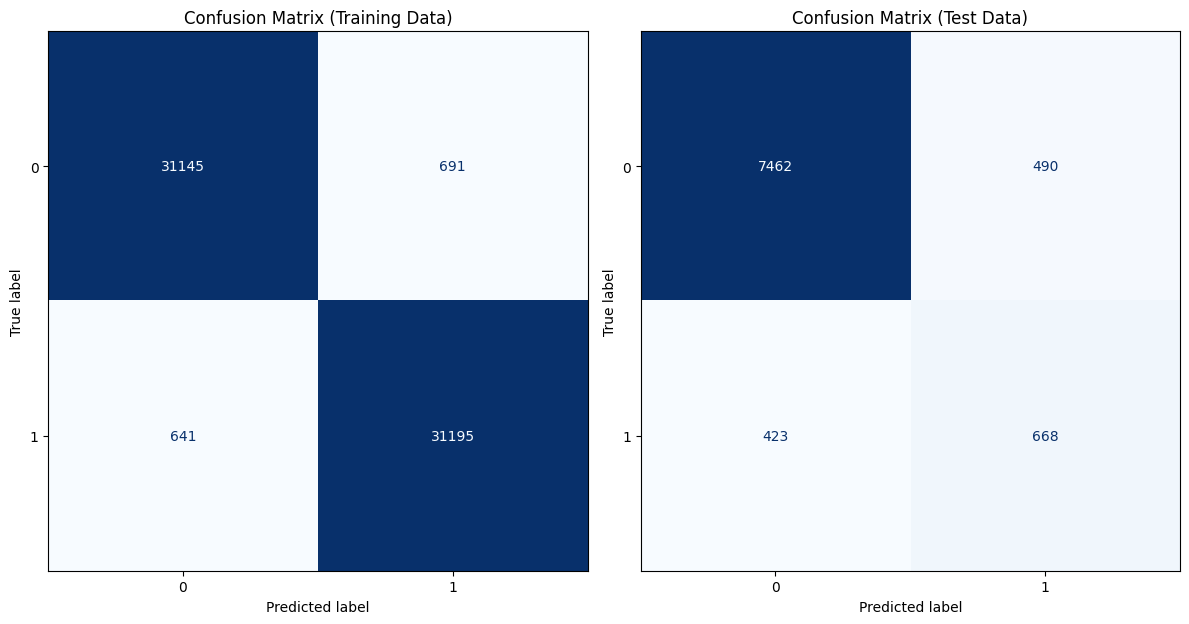

(0.9790802864681493, 0.899037929890523)

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred_train = model.predict(x_train_resampled)
y_pred_test = model.predict(x_test_scaled)

# Calculate accuracy
accuracy_train = metrics.accuracy_score(y_train_resampled, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

# Generate confusion matrices
cm_train = confusion_matrix(y_train_resampled, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Display confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training Confusion Matrix
cmd_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
cmd_train.plot(ax=ax[0], cmap='Blues', colorbar=False)
ax[0].set_title('Confusion Matrix (Training Data)')

# Testing Confusion Matrix
cmd_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
cmd_test.plot(ax=ax[1], cmap='Blues', colorbar=False)
ax[1].set_title('Confusion Matrix (Test Data)')

plt.tight_layout()
plt.show()

accuracy_train, accuracy_test


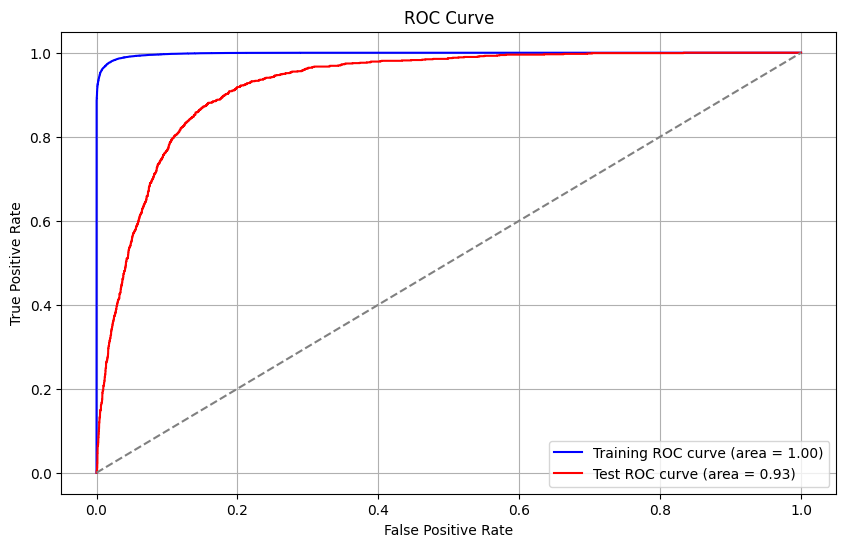

(0.9790802864681493, 0.899037929890523)

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred_train = model.predict(x_train_resampled)
y_pred_test = model.predict(x_test_scaled)

# Get probability estimates for ROC curve
y_prob_train = model.predict_proba(x_train_resampled)[:, 1]
y_prob_test = model.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)

# Compute ROC AUC
roc_auc_train = roc_auc_score(y_train_resampled, y_prob_train)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# Plot ROC Curve
plt.figure(figsize=(10, 6))

# Training ROC Curve
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (area = {roc_auc_train:.2f})')

# Testing ROC Curve
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_test:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

accuracy_train, accuracy_test


In [104]:
loan_classifier.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,0,0,0,0,5,5,261,1,2,0
1,44,1,1,1,0,5,5,151,1,2,0
2,33,2,0,1,0,5,5,76,1,2,0
3,47,3,0,2,0,5,5,92,1,2,0
4,33,4,1,2,0,5,5,198,1,2,0


In [105]:

# Assuming the scaler was fit on these columns
columns_to_scale = ["age", "day", "mon", "dur", "job"]

# Create a DataFrame for user data to ensure the columns align with the scaler
# User data
user_data = np.array([[58, 0, 0, 0, 0, 5, 5, 261, 1, 2]])
user_data_df = pd.DataFrame(user_data, columns=["age", "job", "marital", "education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"])


# Scale the user data
user_data_scaled = user_data_df.copy()
user_data_scaled[columns_to_scale] = scaler.transform(user_data_df[columns_to_scale])

# Make prediction
y_p = model.predict(user_data_scaled)

# Print result
if y_p[0] == 1:
    print('YES')
else:
    print('NO')


NO


In [108]:
# save the scaler by using pickle

import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [106]:
# save the classification model by using pickle

import pickle

with open('insurance_customer_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

In [109]:


model_path = "main/Models/insurance_customer_predictor.pkl"
scaler_path = "main/Models/scaler.pkl"
with open(model_path, 'rb') as f:
    insurance_customer_predictor = pickle.load(f)

with open (scaler_path,'rb') as sc:
    scaler_sc = pickle.load(sc) 
    
user_data = np.array([[58, 0, 0, 0, 0, 5, 5, 261, 1, 2]])
user_data_df = pd.DataFrame(user_data, columns=["age", "job", "marital", "education_qual", "call_type", "day", "mon", "dur", "num_calls", "prev_outcome"])


# Scale the user data
user_data_scaled = user_data_df.copy()
user_data_scaled[columns_to_scale] = scaler_sc.transform(user_data_df[columns_to_scale])

# Make prediction
y_p = insurance_customer_predictor.predict(user_data_scaled)

# Print result
if y_p[0] == 1:
    print('YES')
else:
    print('NO')

NO
